# EE915: Week-6 - Project-6 - K Means Clustering
**Name**: Venkateswar Reddy Melachervu </br>
**Roll No.**: 23156022 </br>
**Email**: vmela23@iitk.ac.in </br>
**Dataset**: xxxxxx </br>
**Professor**: Prof. Aditya K. Jagganatham </br>
**TAs**: Meesam and Priyanka </br>

This project uses K Means Clustering

&copy; Venkateswar Reddy Melachervu 2024. All rights reserved.


In [ ]:
%pip install seaborn
%pip install wordcloud
%pip install scikit-learn
%pip install matplotlib
%pip install ffmpeg-python

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, f1_score, average_precision_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

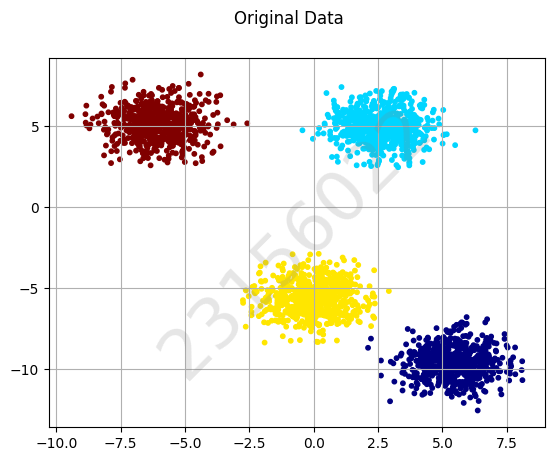

In [63]:
# Define roll number, name, email
roll_number = "23156022" 
name = "Venkateswar Reddy Melachervu"
email = "vmela23@iitk.ac.in"

X, y = make_blobs(n_samples=2500,centers=4, n_features=2,random_state = 10)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet',s=10)
plt.suptitle('Original Data')
plt.grid(1,which='both')
plt.axis('tight')
# Add centered diagonal watermark
plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2,
             rotation=45, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()



In [64]:

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

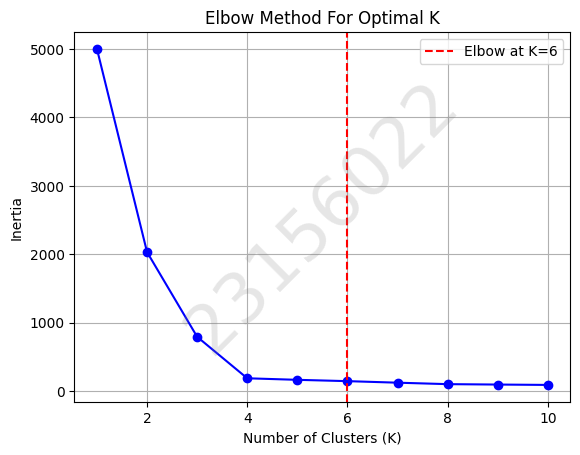

In [65]:
# Determine the optimal number of clusters

# Elbow method
"""
A common way to find the optimal number of clusters is by using the elbow method, which involves:
The elbow method steps are:
1. Choosing a range of cluster numbers to try (e.g., from 1 to 10).
2. For each cluster number, running the k-means algorithm and calculating the inertia (sum of squared distances between each point and its centroid).
3. Plotting the inertia values against the number of clusters.
4. Looking for an "elbow" in the plot, which represents the point where the decrease in inertia starts to stabilize.
5. Inertia is defined as the sum of squared distances between each point and its centroid. 
6. It can be calculated as follows:
    inertia = sum((X - centroid)^2)

A common way to find the elbow point from the set of inertia values is by analyzing the second derivative of the inertia, which represents the acceleration of the inertia changes. 
The elbow is generally where the acceleration is minimal, indicating the curve is flattening out.

"""
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Calculate the first and second derivative of inertia
inertia_diff = np.diff(inertia)
inertia_accel = np.diff(inertia_diff)

# To find the elbow, find the point where the second derivative is minimal
elbow_point = np.argmin(inertia_accel) + 2  # +2 to account for double offset from np.diff

plt.figure()
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)

# Highlight the elbow point
plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Elbow at K={elbow_point}')
plt.legend()

# Add the watermark
plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2,
             rotation=45, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

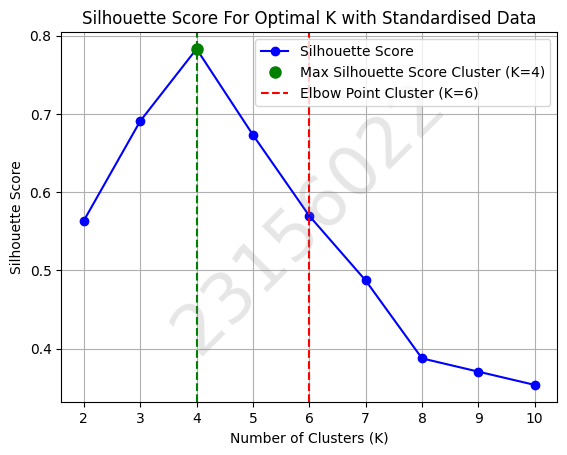

In [66]:
# Quality of clustering - silhouette score with raw input data

"""
Silhouette score is a good measure of how well each data point fits into its assigned cluster, . 

The silhouette score is a measure of how well each data point fits into its assigned cluster and it is used to determine the optimal number of clusters. 
It ranges from -1 to 1.
 - 1 indicates that the data point is well clustered, 
 - 0 indicates that the data point is not well clustered, 
 - -1 indicates that the data point is far from its assigned cluster

The optimal K value is where the silhouette score reaches its maximum.

"""
silhouette_scores = []

# Initialize a variable to store the minimum silhouette score and corresponding k value
min_score = float('inf')
min_k = None

# Initialize a variable to store the maximum silhouette score and corresponding k value
max_score = -1  # Silhouette score range is [-1, 1], so start below the minimum possible score
max_k = None

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    # Check if the current score is the highest
    if score > max_score:
        max_score = score
        max_k = k

plt.figure()
plt.plot(range(2, 11), silhouette_scores, 'bo-', label='Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal K with Standardised Data')
plt.grid(True)

# Highlight the point with the highest silhouette score
plt.plot(max_k, max_score, 'go', markersize=8, label=f'Max Silhouette Score Cluster (K={max_k})')

# Vertical line for the maximum silhouette score
plt.axvline(x=max_k, color='g', linestyle='--')

# Additional vertical line for elbow point
plt.axvline(x=6, color='r', linestyle='--', label=f'Elbow Point Cluster (K={elbow_point})')

plt.legend()

plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2,
             rotation=45, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

Inertia: 4910.8849522915825
Silhouette Score: 0.7685062522619707


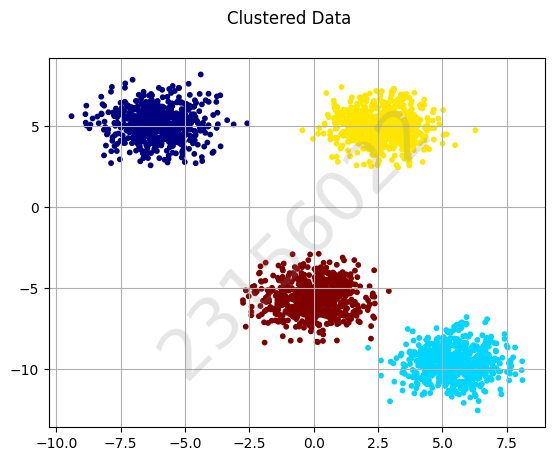

In [67]:
# Predicted cluster scatter plot with raw input data

# Train the model with the optimal K
optimal_k = max_k
kmeans = KMeans(n_clusters=optimal_k, random_state=10)
y_pred = kmeans.fit_predict(X)
y_kmeans = kmeans.labels_

# Evaluate the model
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(X, y_kmeans)

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clustered data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='jet', s=10)
plt.suptitle('Clustered Data')
plt.grid(1,which='both')
plt.axis('tight')

# Add centered diagonal watermark
plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2,
             rotation=45, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

Inertia: 188.03059945582453
Silhouette Score: 0.7829928948967044


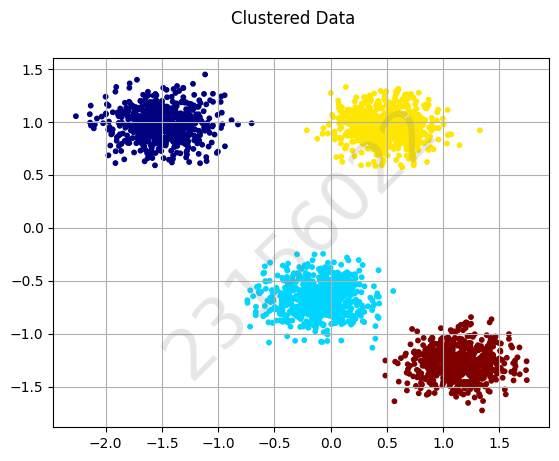

In [68]:
# Predicted cluster scatter plot with standardized data

# Train the model with the optimal K
optimal_k = max_k
kmeans = KMeans(n_clusters=optimal_k, random_state=10)
y_pred_scaled = kmeans.fit_predict(X_scaled)
y_kmeans = kmeans.labels_

# Evaluate the model
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(X_scaled, y_kmeans)

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clustered data
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred_scaled, cmap='jet', s=10)
plt.suptitle('Clustered Data')
plt.grid(1,which='both')
plt.axis('tight')

# Add centered diagonal watermark
plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2,
             rotation=45, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

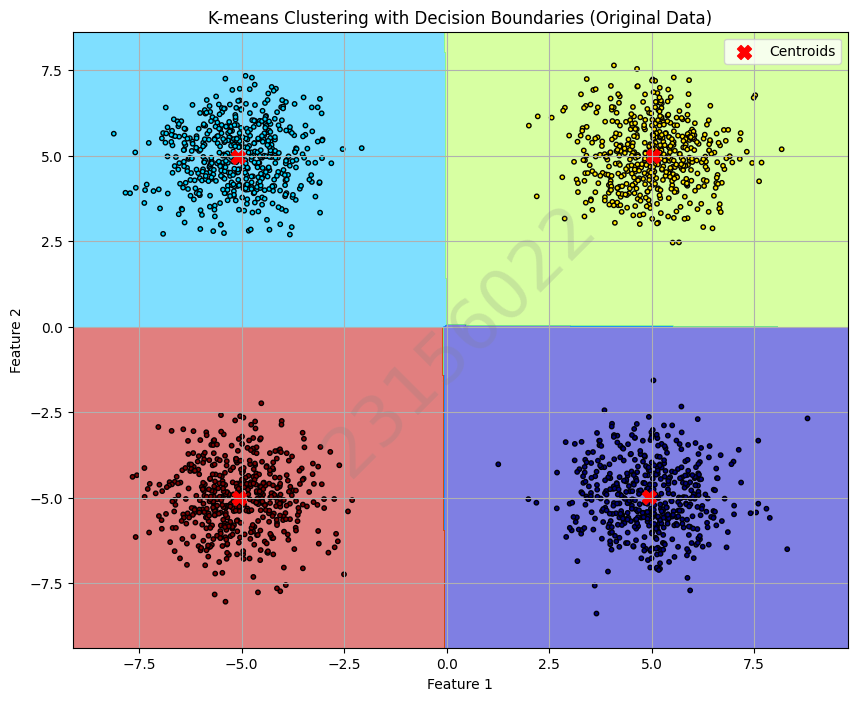

In [69]:
# Plot decision boundaries without animation

# Generate a high volume of data
np.random.seed(0)
X = np.vstack([np.random.normal(loc, 1.0, (500, 2)) for loc in [(-5, -5), (5, 5), (-5, 5), (5, -5)]])

# Create K-means instance and fit on original data
kmeans = KMeans(n_clusters=4, random_state=10)
kmeans.fit(X)
y_kmeans = kmeans.labels_
centroids = kmeans.cluster_centers_

# Define mesh size and decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='jet')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='jet', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X', label='Centroids')
plt.title('K-means Clustering with Decision Boundaries (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

# Add centered diagonal watermark
plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2,
         rotation=45, ha='center', va='center', transform=plt.gca().transAxes)

plt.legend()
plt.show()


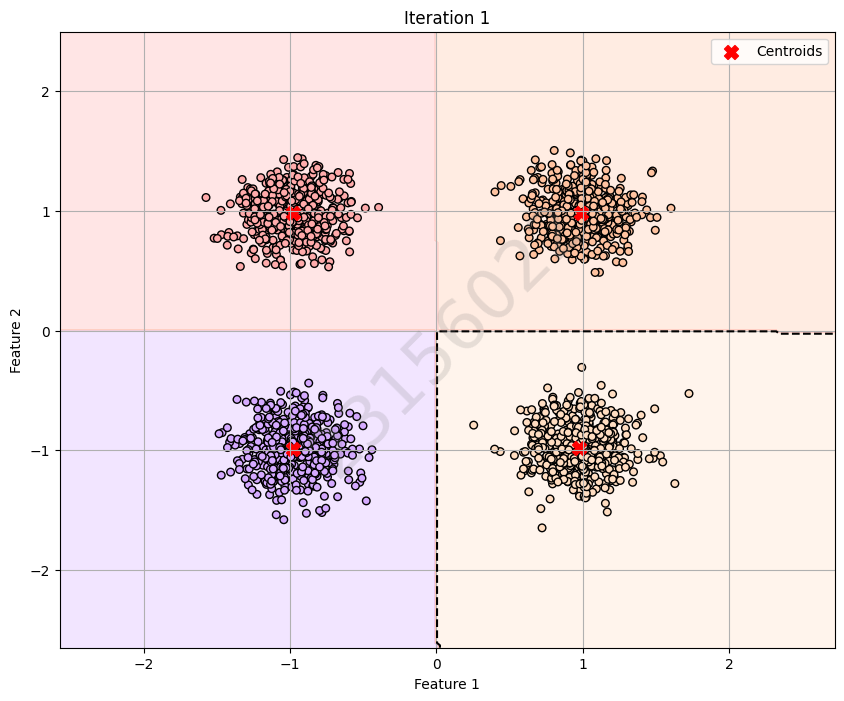

In [70]:
# Plot decision boundaries with animation

# Generate synthetic data
np.random.seed(0)
X = np.vstack([np.random.normal(loc, 1.0, (500, 2)) for loc in [(-5, -5), (5, 5), (-5, 5), (5, -5)]])

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create K-means instance
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=1, max_iter=1, random_state=10)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))
cmap = ListedColormap(['#FFDDC1', '#FFABAB', '#FFC3A0', '#D5AAFF'])

def plot_decision_boundaries(ax, X, kmeans):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    ax.contour(xx, yy, Z, colors='k', levels=[0], linestyles='--')

def update(num, X, ax, kmeans):
    kmeans.max_iter = num
    kmeans.fit(X)
    
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    # Clear previous plots
    ax.clear()
    
    # Plot decision boundaries
    plot_decision_boundaries(ax, X, kmeans)
    
    # Plot data points and cluster centers
    scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap=cmap, edgecolor='k')
    centers_scat = ax.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X', label='Centroids')
    
    ax.set_title(f'Iteration {num}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.grid(True)
    # Add centered diagonal watermark
    plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2,
         rotation=45, ha='center', va='center', transform=plt.gca().transAxes)
    return scatter, centers_scat

# Create the animation
ani = animation.FuncAnimation(
    fig, 
    update, 
    frames=range(1, 21),  # Adjust number of frames as needed
    fargs=(X_scaled, ax, kmeans),
    interval=500,  # Time between frames in milliseconds
    blit=False
)

# Display the animation
ani.save('kmeans_animation.mp4', writer='ffmpeg')

In [71]:
!jupyter nbconvert --to pdf Proj_06_Kmeans_Full.ipynb


[NbConvertApp] Converting notebook Proj_06_Kmeans_Full.ipynb to pdf
[NbConvertApp] Support files will be in Proj_06_Kmeans_Full_files\
[NbConvertApp] Making directory .\Proj_06_Kmeans_Full_files
[NbConvertApp] Writing 58035 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 682795 bytes to Proj_06_Kmeans_Full.pdf
